<a href="https://colab.research.google.com/github/zoetankersley/DS2022/blob/main/02_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 2: $k$ Nearest Neighbor

### Do any four.

Q1, Q2, Q3, Q5

Zoe Tankersley

ID: nab9pr

In [412]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Regression predicts a continuous numerical value, such as temperature or price, while classification predicts a categorical class label, such as mine type or disease status. While regression outputs numbers, classification outputs categories.


2. What is a confusion table/matrix? What does it help us understand about a model's performance?

A confusion matrix compares the actual versus predicted class labels in a classification problem. It shows how often each class is correctly predicted and which classes are frequently misclassified, helping us understand the model’s strengths and weaknesses.


3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the proportion of correct predictions out of all predictions. It isn't entirely sufficient for evaluating predictive performance if the classes are imbalanced. A model can have a good accuracy score by just predicting the dominant class, even if it fails to learn the minority class pattern. This is a problem, especially when we are interested in the minority class.


4. What does the root mean squared error quantify about a particular model?

Root mean squared error quantifies the average difference between predicted and actual values in regression. Lower RMSE values indicate more accurate models. It is highly sensitive to large errors because the errors are squared before being averaged.

5. What are overfitting and underfitting?

Overfitting occurs when a model follows the training data too closely, capturing too much noise. Overfitting can miss the underlying trends, which reduces performance on new data. Underfitting happens when a model is too simple to capture the true structure in the data, resulting in poor performance on both training and test sets.


6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

Splitting the data into training and test sets lets us see how the model performs on unseen data. Selecting k by evaluating accuracy or RMSE on the test set ensures that the model generalizes well to new data rather than just memorizing the training set. This reduces the risk of overfitting.


7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Reporting a class label gives a clear, definitive prediction, which is easy to interpret, but does not convey uncertainty. This can be harmful if the users blindly trust a model without knowing its capabilities. Reporting a probability distribution over class labels provides more information about confidence in predictions and allows for more thoughtful decisions, but it can be more complex to interpret and act on.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).


In [413]:
df=pd.read_csv("data/land_mines.csv")
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [414]:
df.isna().sum()

,0
voltage,0
height,0
soil,0
mine_type,0


In [415]:
df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [416]:
df.shape

(338, 4)

In [417]:
df['mine_type'].value_counts()

,count
mine_type,
1,71
2,70
3,66
4,66
5,65


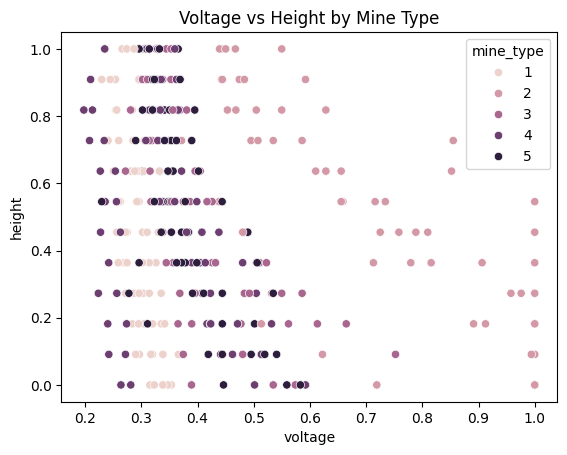

In [418]:
from matplotlib import legend
sns.scatterplot(data=df,x='voltage',y='height',hue='mine_type')

plt.title("Voltage vs Height by Mine Type")
plt.show()

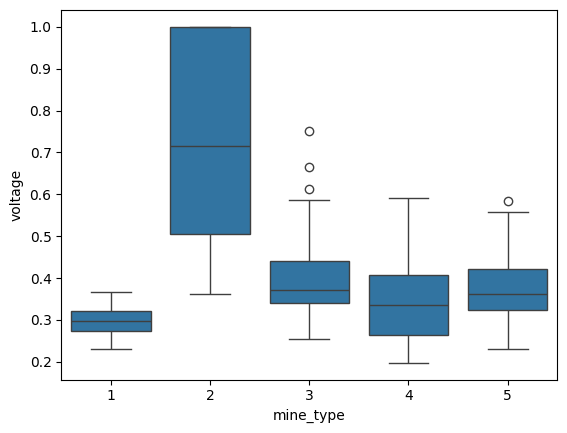

In [419]:
sns.boxplot(data=df, x='mine_type', y='voltage')
plt.show()

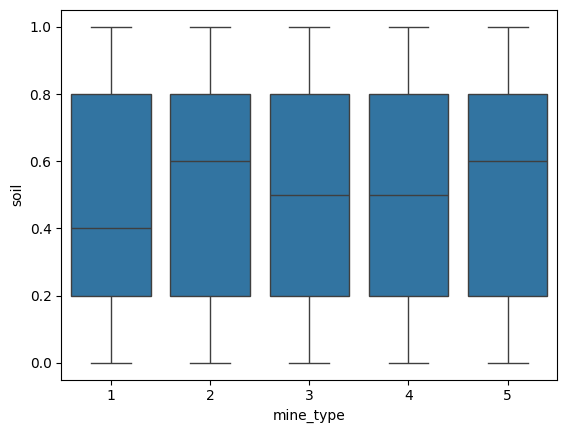

In [420]:
sns.boxplot(data=df, x='mine_type', y='soil')
plt.show()

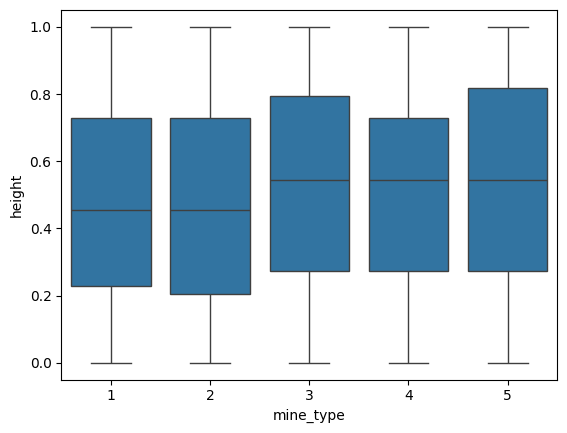

In [421]:
sns.boxplot(data=df, x='mine_type', y='height')
plt.show()

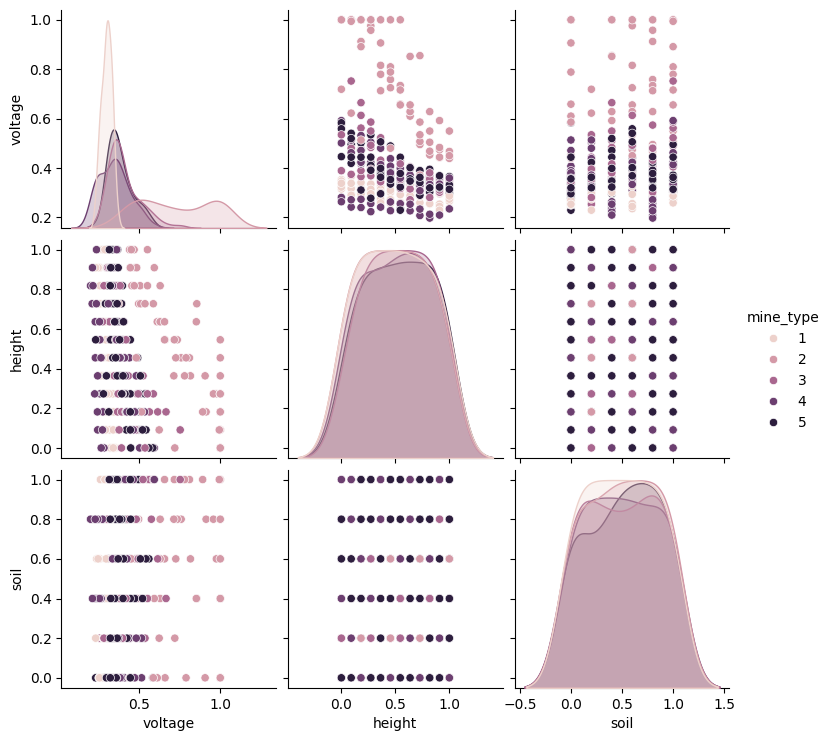

In [422]:
sns.pairplot(df, hue='mine_type')
plt.show()

It is most evident that mine type 2 has the highest voltage.

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [423]:
from sklearn.model_selection import train_test_split
U = df[['voltage','height','soil']]
y = df['mine_type']
U_train, U_test, y_train, y_test = train_test_split(U, y, test_size=0.5,random_state=42)

print("Training set size:", U_train.shape[0])
print("Test set size:", U_test.shape[0])

Training set size: 169
Test set size: 169



3. Build a $k$-NN classifier. Explain how you select $k$.


In [424]:
def minmax(x):
    return (x - min(x)) / (max(x) - min(x))

U_train = U_train.apply(minmax)
U_test  = U_test.apply(minmax)

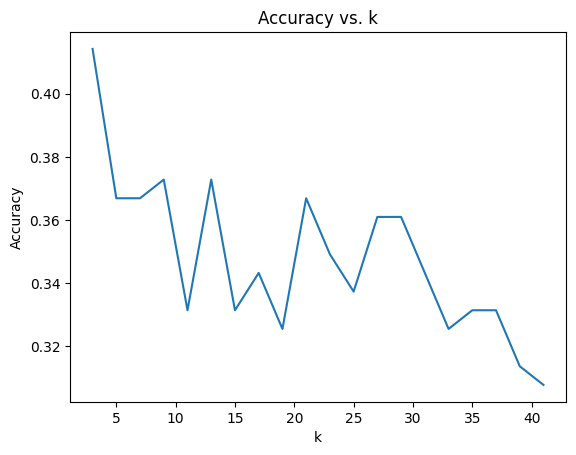

In [425]:
from sklearn.neighbors import KNeighborsClassifier
k_grid = [(2*k)+1 for k in range(1, 21)]

accuracy = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(U_train, y_train)
    accuracy.append(model.score(U_test, y_test))

plt.plot(k_grid, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

In [426]:
best_k = k_grid[np.argmax(accuracy)]
print("Best k:", best_k)

Best k: 3


In [427]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=best_k)
model = model.fit(U_train, y_train)
y_hat = model.predict(U_test)
df_results=pd.DataFrame({'Actual':y_test, 'Predicted':y_hat})
df_results.head()

,Actual,Predicted
110,3,1
333,5,5
185,5,4
76,2,3
211,5,5


4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?


In [428]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_table = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Table:")
print(conf_table)

Confusion Table:
Predicted   1   2   3  4  5
Actual                     
1          21   0   6  3  7
2           0  25   4  4  0
3          10   3  12  1  6
4          10   4   8  5  9
5           6   1  11  6  7


In [429]:
accuracy = accuracy_score(y_test, y_hat)
print("\nOverall Test Accuracy:", round(accuracy, 3))


Overall Test Accuracy: 0.414


The KNN model achieved an overall accuracy of 0.414 on the test set, which is not very high. This means that less than half of the predictions are correct. Performance is best for mine type 2, while types 3, 4, and 5 are frequently misclassified.

5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

Even though the model predicts some mine types accurately, it frequently misclassifies the ones with overlapping features. In practice, I think the model should be used for guidance and to support decisions, but not necessarily make decisions. If we are deciding how to safely remove land mines, the predictions can help prioritize which mines to inspect first. However, the mines prone to misclassification should be verified by trained experts to ensure proper protocols.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.


In [430]:
df=pd.read_csv("data/USA_cars_datasets.csv")
df=df[['price','year','mileage']]
df.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [431]:
df.isna().sum()

,0
price,0
year,0
mileage,0


In [432]:
df.shape

(2499, 3)

There are no NAs to handle. There are 2499 observations and 3 variables.

2. Maxmin normalize `year` and `mileage`.


In [433]:
def minmax(x):
  u=(x-min(x))/(max(x)-min(x))
  return u
y=df['price']
X=df.loc[:,['year','mileage']]
U=X.apply(minmax)
U.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.

In [434]:
from sklearn.model_selection import train_test_split
U_train, U_test, y_train, y_test = train_test_split(U, y, test_size=0.2, random_state=100)
print("Training set size:", U_train.shape[0])
print("Test set size:", U_test.shape[0])

Training set size: 1999
Test set size: 500



4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


k: 3 MSE: 126446573.21822222


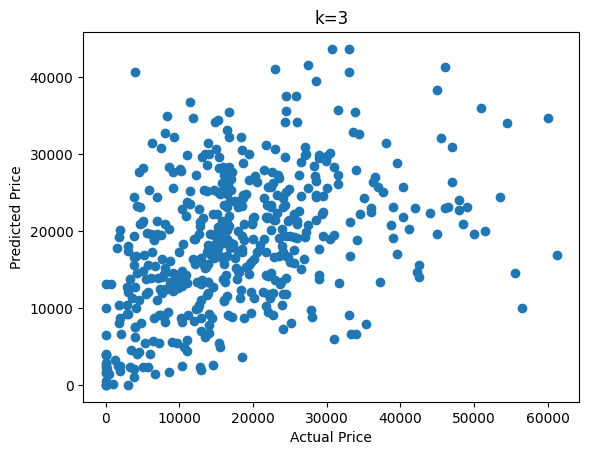

k: 10 MSE: 110802185.58681999


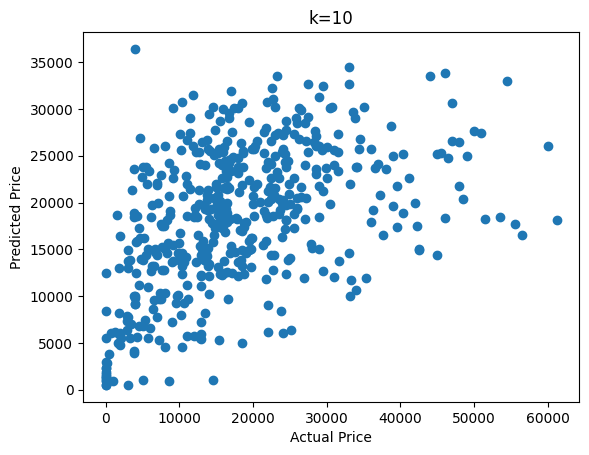

k: 25 MSE: 103170457.848608


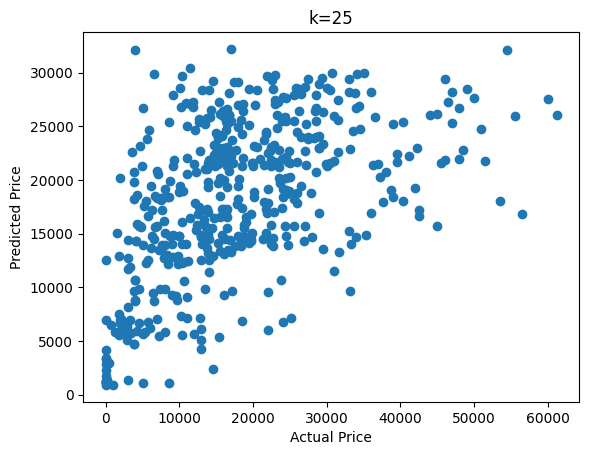

k: 50 MSE: 99695443.96419598


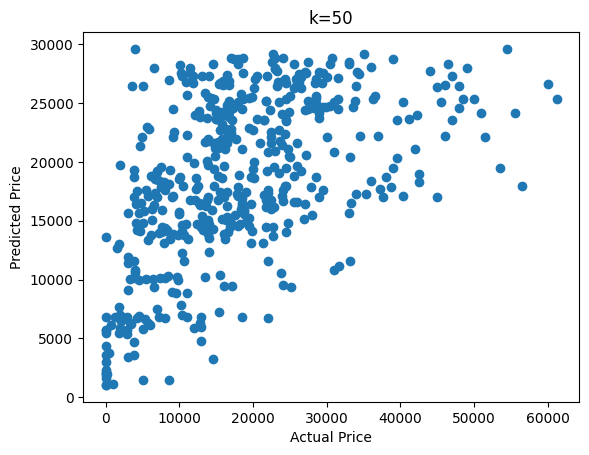

k: 100 MSE: 98271058.96092059


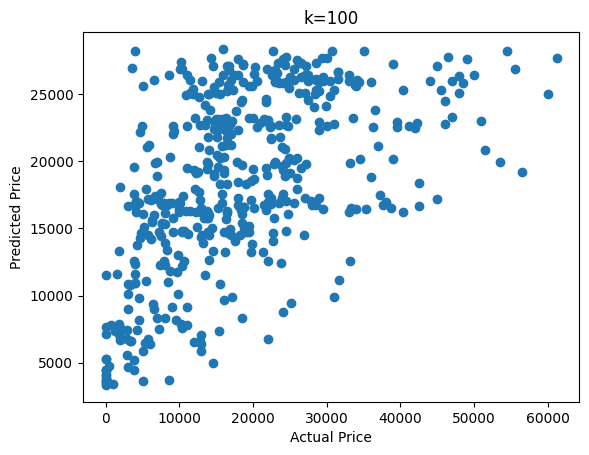

k: 300 MSE: 100477298.914212


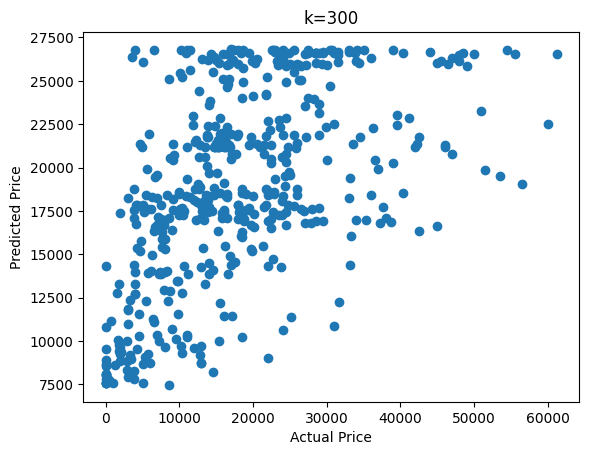

In [435]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_grid=[3,10,25,50,100,300]
for k in k_grid:
  model=KNeighborsRegressor(n_neighbors=k)
  model.fit(U_train,y_train)
  y_hat=model.predict(U_test)
  mse=mean_squared_error(y_test,y_hat)
  print("k:",k,"MSE:",mse)
  plt.scatter(y_test,y_hat)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title("k="+str(k))
  plt.show()

k: 3 MSE: 126446573.21822222

k: 10 MSE: 110802185.58681999

k: 25 MSE: 103170457.848608

k: 50 MSE: 99695443.96419598

k: 100 MSE: 98271058.96092059

k: 300 MSE: 100477298.914212


As we increase k, the mean squared error decreases because the model becomes less sensitive to noise and variance decreases. I also notice that the y axis range decreases as the predicted values compress to the overall mean price. However, as we increase k to 300, the mean squared error goes back up. The predictions cluster into horizontal bands around y=17500 and y=27500. This shows that high priced cars are underpredicted and low priced cars are overpredicted at a large k value.

5. Determine the optimal $k$ for these data.

The optimal k for this data is k=100 because it has the lowest mean squared error.

6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

For smaller k values, the predicted vs. actual plots were more scattered and noisy. This indicates overfitting because the model is too sensitive to variation in the training data. As k increased to more moderate values, the predictions lined up more closely with the actual values and there was a more linear relationship on the plots. As k became very large, for example k=300, the predictions began to compress into horiontal bands. This was underfitting because the model over-generalized the data and failed to capture the true relationshop between year, mileage, and price.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?


In [436]:
df=pd.read_csv("./data/zoo.csv")
df.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [437]:
df.shape

(101, 18)

In [438]:
# Animals in each class:
for class_label in sorted(df['class'].unique()):
    print(f"Class {class_label}:")
    print(list(df[df['class'] == class_label]['animal']))
    print()

Class 1:
['aardvark', 'antelope', 'bear', 'boar', 'buffalo', 'calf', 'cavy', 'cheetah', 'deer', 'dolphin', 'elephant', 'fruitbat', 'giraffe', 'girl', 'goat', 'gorilla', 'hamster', 'hare', 'leopard', 'lion', 'lynx', 'mink', 'mole', 'mongoose', 'opossum', 'oryx', 'platypus', 'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon', 'reindeer', 'seal', 'sealion', 'squirrel', 'vampire', 'vole', 'wallaby', 'wolf']

Class 2:
['chicken', 'crow', 'dove', 'duck', 'flamingo', 'gull', 'hawk', 'kiwi', 'lark', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'rhea', 'skimmer', 'skua', 'sparrow', 'swan', 'vulture', 'wren']

Class 3:
['pitviper', 'seasnake', 'slowworm', 'tortoise', 'tuatara']

Class 4:
['bass', 'carp', 'catfish', 'chub', 'dogfish', 'haddock', 'herring', 'pike', 'piranha', 'seahorse', 'sole', 'stingray', 'tuna']

Class 5:
['frog', 'frog', 'newt', 'toad']

Class 6:
['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp']

Class 7:
['clam', 'crab', 'crayfish', 'l

In [439]:
# Size of the classes:
df['class'].value_counts()

,count
class,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [440]:
# Describing the features:
features=df.columns[1:-1]
df[features].describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [441]:
# Variation in the features:
print("Feature standard deviations:")
print(df[features].std(), "\n")

Feature standard deviations:
hair        0.496921
feathers    0.400495
eggs        0.495325
milk        0.493522
airborne    0.427750
aquatic     0.481335
predator    0.499505
toothed     0.491512
backbone    0.384605
breathes    0.407844
venomous    0.271410
fins        0.376013
legs        2.033385
tail        0.439397
domestic    0.336552
catsize     0.498314
dtype: float64 



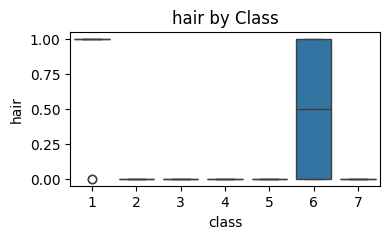

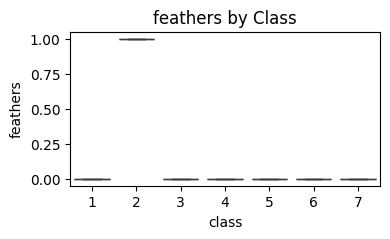

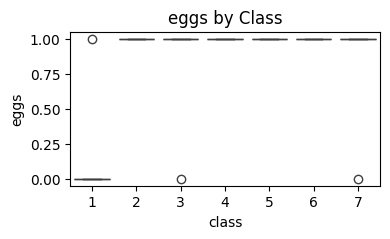

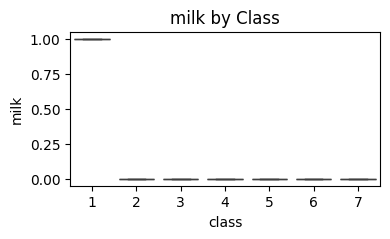

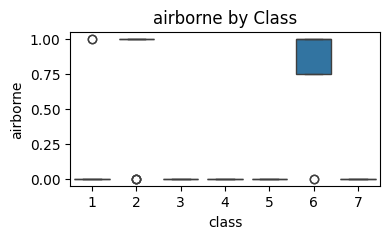

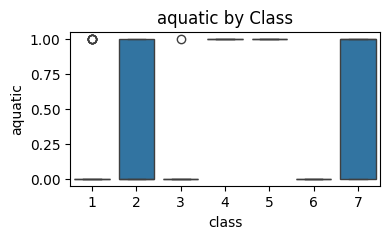

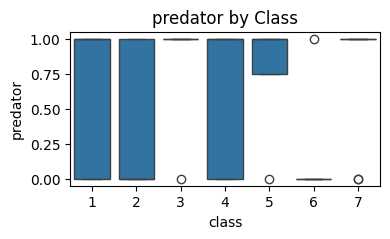

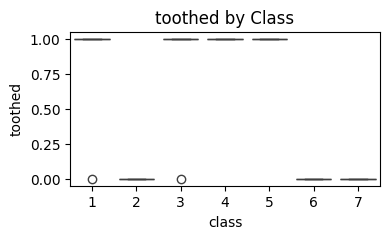

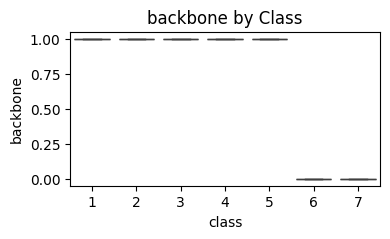

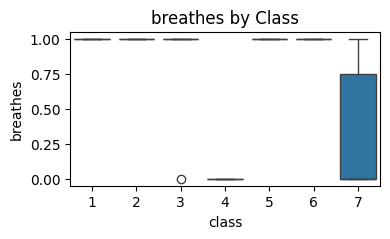

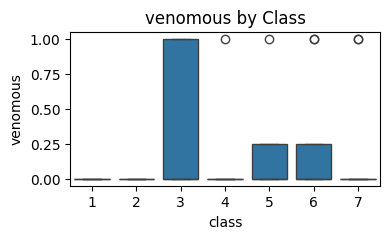

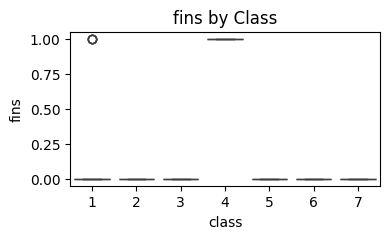

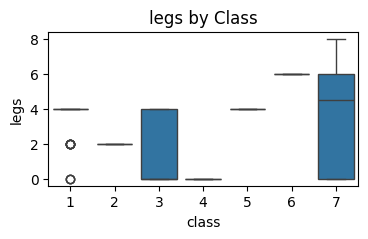

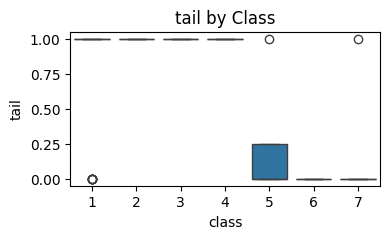

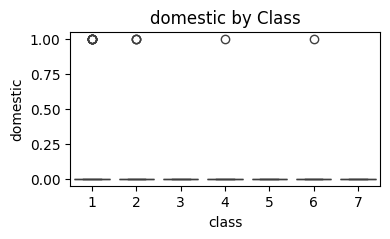

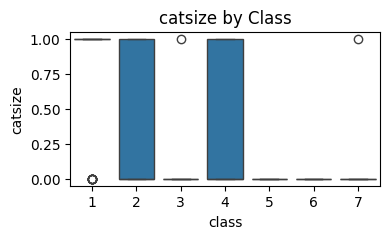

In [442]:
#EDA: Boxplots:
for feature in features:
    plt.figure(figsize=(4,2))
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(f"{feature} by Class")
    plt.show()

Some classes are easy to predict because they have unique features. For example, class 1 can be identified by hair and milk production, class 2 because they all have feathers, class 4 by fins and breathing, and class 6 because they are the least likely predators. Other classes are harder to separate because they share many features, so predicting these classes likely requires considering combinations of multiple characteristics rather than a single variable.



2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [443]:
U=df.iloc[:,1:-1]
y=df['class']
U_train, U_test, y_train, y_test = train_test_split(U, y, test_size=0.5, random_state=100)

print("Training set size:", U_train.shape[0])
print("Test set size:", U_test.shape[0])

Training set size: 50
Test set size: 51


In [444]:
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

U_train = U_train.apply(minmax)
U_test = U_test.apply(minmax)

3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

In [445]:
k_grid = [(2*k)+1 for k in range(1, 21)]

accuracy = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(U_train, y_train)
    accuracy.append(model.score(U_test, y_test))

best_k = k_grid[np.argmax(accuracy)]
print("Best k:", best_k)

Best k: 3


In [446]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(U_train, y_train)
y_hat = model.predict(U_test)
df_results=pd.DataFrame({'Actual':y_test, 'Predicted':y_hat})
df_results.head()

,Actual,Predicted
37,2,2
86,4,4
26,5,3
93,1,1
35,1,1


The best choice for k is 3. To pick k, I tested several odd values of k and evaluated the accuracy of each model on the test set. I picked the k value whcih yielded the highest accuracy.

4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

In [447]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_table = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Table:")
print(conf_table)
accuracy = accuracy_score(y_test, y_hat)
print("\nOverall Test Accuracy:", round(accuracy, 3))

Confusion Table:
Predicted   1   2  3  4  6  7
Actual                       
1          23   0  0  0  0  0
2           0  12  0  0  0  0
3           0   0  2  1  0  0
4           0   0  0  3  0  0
5           0   0  2  1  0  0
6           0   0  0  0  4  1
7           0   0  0  0  0  2

Overall Test Accuracy: 0.902


Based on the confusion matrix, the model is overall very accurate. Classes 1, 2, and 6 were predicted with 100% accuracy, which makes sense because these classes have unique features that clearly distinguish them. Class 3 had mixed results: 2 animals were predicted correctly, while 2 were misclassified as class 5. Classes 4 and 7 had minimal errors. Class 5 was not predicted at all, likely because most of its samples were in the test set, leaving too few examples in the training set for the model to learn from effectively. The accuracy score ultimately came out to 0.902.




5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [448]:
U=df[['milk','aquatic','airborne']]
y=df['class']
U_train, U_test, y_train, y_test = train_test_split(U, y, test_size=0.5, random_state=100)
U_train = U_train.apply(minmax)
U_test = U_test.apply(minmax)

k_grid = [(2*k)+1 for k in range(1, 21)]

accuracy = []

for k in k_grid:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit
    model.fit(U_train, y_train)
    accuracy.append(model.score(U_test, y_test))

best_k = k_grid[np.argmax(accuracy)]
print("Best k:", best_k)

Best k: 5


In [449]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(U_train, y_train)
y_hat = model.predict(U_test)
df_results=pd.DataFrame({'Actual':y_test, 'Predicted':y_hat})
df_results.head()

,Actual,Predicted
37,2,2
86,4,4
26,5,4
93,1,1
35,1,1


In [450]:
conf_table = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Table:")
print(conf_table)
accuracy = accuracy_score(y_test, y_hat)
print("\nOverall Test Accuracy:", round(accuracy, 3))

Confusion Table:
Predicted   1   2  4
Actual              
1          23   0  0
2           0  12  0
3           0   2  1
4           0   0  3
5           0   0  3
6           0   5  0
7           0   0  2

Overall Test Accuracy: 0.745


In [451]:
probs=model.predict_proba(U_test.values)
print("Predicted probabilities for first 15 test samples:")
print(probs[:15])

Predicted probabilities for first 15 test samples:
[[0.  0.6 0.  0.  0.  0.4 0. ]
 [0.  0.  0.  0.8 0.  0.  0.2]
 [0.  0.  0.  0.8 0.  0.  0.2]
 [0.6 0.2 0.  0.  0.  0.2 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.8 0.  0.  0.2]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0. ]
 [0.  0.6 0.  0.4 0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.6 0.  0.  0.  0.4 0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.4 0.2 0.  0.  0.  0.4]
 [0.  0.4 0.2 0.  0.  0.  0.4]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


When we use only milk, aqautic, and airborne as featured, the kNN classifier only predicted classes 1, 2, and 4. The predictions were 100% accureate for class 1 because they (mammals) are the only class that produces milk. The model was fairly accurate for class 2, and less so for class 4. Other classes were not predicted at all, because their combinations of these three features overlap with other classes, making them indistinguishable with this limited feature set. However, when using predict_proba, most classes are represented by nonzero probabilities because k-NN considers neighbors from every class when calculating probabilities, even if a class does not end up as the predicted label. Class 5 has 0.0 probabilities for every test sample, meaning it is not represented in any neighbors and cannot be predicted. This shows that using only a few features limits the model’s ability to predict all classes.